In [50]:
#ML
#Gender Identification
#姓名辨識
def gender_features(word):
    return {'last_letter': word[-1]}
gender_features('Shrek')
#取得最後一個文字作為特徵

{'last_letter': 'k'}

In [51]:
#取得特徵集
import nltk
from nltk.corpus import names
import random
names = ([(name, 'male') for name in names.words('male.txt')] +
         [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

In [52]:
#===============
#import random

#list = [20, 16, 10, 5];
#random.shuffle(list)
#print ("Shuffle : ",  list)

#===============

In [53]:
featuresets = [(gender_features(n), g) for (n,g) in names]
featuresets

[({'last_letter': 'f'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'o'}, 'male'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'g'}, 'male'),
 ({'last_letter': 'i'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'l'}, 'male'),
 ({

In [54]:
train_set, test_set = featuresets[500:], featuresets[:500]

In [55]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [56]:
classifier

In [57]:
classifier.classify(gender_features('Neo'))

'male'

In [24]:
classifier.classify(gender_features('Trinity'))

'female'

In [42]:
nltk.classify.accuracy(classifier, test_set)

0.736

{'last_letter': 'o'}

In [ ]:
#近鄰法(K-nearest neighbors)

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
iris.data.shape

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

#Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)
#Training
knn.fit(df.iloc[0:150,0:4], df['Target'])
knn.score(df.iloc[0:150,0:4], df['Target'])

x_new = np.array([[5.9, 3.0, 5.1, 1.8], [0.1, 0.2, 0.3, 0.4]])
df_new = df_new=df.iloc[0:3,0:4]
#Single Row
knn.predict([5.9, 3.0, 5.1, 1.8])
#Array
knn.predict(x_new)
#Pandas
knn.predict(df_new)
knn.predict(df.iloc[145:149,0:4])
#Print
print('Prediction:',knn.predict(df.iloc[145:149,0:4]))



In [ ]:
############Visual iris with KNN

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20

iris = datasets.load_iris()
X = iris.data[:, :2]  
                     
y = iris.target

h = .02  


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
 

plt.show()

In [ ]:
#決策樹(Decision Tree)

In [55]:
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


iris = datasets.load_iris()

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

dtc = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2', dtc.score(X_test, y_test))
print('RMSE: \n', rmse)




R^2 1.0
RMSE: 
 0.0


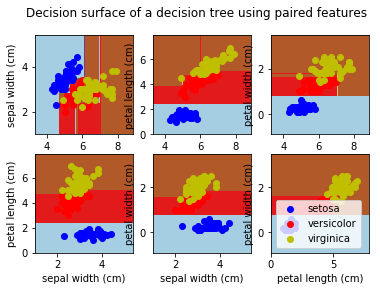

In [53]:
#####ploting with Scatter plot 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

iris = datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [ ]:
#隨機森林(Random Forest)

/Users/jerry2017/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R^2 1.0
RMSE: 
 0.0
DecisionTree with features [0, 1] has a score of 0.926666666667
RandomForest with 40 estimators with features [0, 1] has a score of 0.926666666667
ExtraTrees with 40 estimators with features [0, 1] has a score of 0.926666666667
AdaBoost with 40 estimators with features [0, 1] has a score of 0.84
DecisionTree with features [0, 2] has a score of 0.993333333333
RandomForest with 40 estimators with features [0, 2] has a score of 0.993333333333
ExtraTrees with 40 estimators with features [0, 2] has a score of 0.993333333333
AdaBoost with 40 estimators with features [0, 2] has a score of 0.993333333333
DecisionTree with features [2, 3] has a score of 0.993333333333
RandomForest with 40 estimators with features [2, 3] has a score of 0.993333333333
ExtraTrees with 40 estimators with features [2, 3] has a score of 0.993333333333
AdaBoost with 40 estimators with features [2, 3] has a score of 0.993333333333


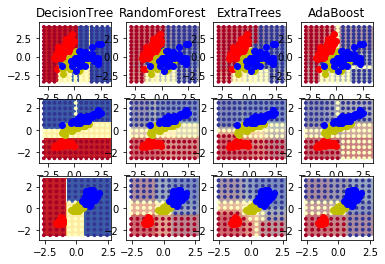

In [56]:
from sklearn.datasets import load_iris
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier


iris = datasets.load_iris()

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

rf = RandomForestClassifier(n_estimators=10)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2', rf.score(X_test, y_test))
print('RMSE: \n', rmse)

####Plotting

#n_samples：表示數據樣本點個數，預設值100
#n_features：表示數據的維度，預設值2
#centers：產生數據的中心點，預設值3
#cluster_std：數據集的標準差，浮點數或者浮點數序列，默認值1.0
#center_box：中心確定之後的數據邊界，默認值（-10.0，10.0）
#shuffle：預設值為真
#random_state：種子


import numpy as np
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 40
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  
plot_step_coarser = 0.5  
RANDOM_SEED = 13  

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:

        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print( model_details + " with features", pair, "has a score of", scores )

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a black outline
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        for i, c in zip(xrange(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                        cmap=cmap)

        plot_idx += 1  # move on to the next plot in sequence

#plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

In [ ]:
#CV
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
cv_results = cross_val_score(reg_all, X_train, y_train, cv=50)

print(cv_results)
print("Average 5-Fold CV Score: {:.4f}".format(np.mean(cv_results)))


In [ ]:
#confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred))

#######ROC with LogisticRegression
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df_data[0:100],
                                                    df_target[0:100],
                                                    test_size = 0.4,
                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import confusion_matrix, classification_report

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))


In [116]:
#句子分割
#句子分割可以看作是一個標點符號的分類任務：每當我們遇到一個可能會結束一個句子的符號，如句號或問號，我們必須決定它是否終止了當前句子。

In [121]:
import nltk  
import nltk.data  
  
def splitSentence(paragraph):  
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')  
    sentences = tokenizer.tokenize(paragraph)  
    return sentences  
  
if __name__ == '__main__':  
    print (splitSentence("My name is Tom. I am a boy. I like soccer!"))  

['My name is Tom.', 'I am a boy.', 'I like soccer!']


In [122]:
from nltk.tokenize import WordPunctTokenizer    
  
def wordtokenizer(sentence):  
    #分段  
    words = WordPunctTokenizer().tokenize(sentence)  
    return words  
  
if __name__ == '__main__':  
    print (wordtokenizer("My name is Tom."))  

['My', 'name', 'is', 'Tom', '.']


In [12]:
import pandas as pd
#w = {
#    '1':['今天天氣好嗎','No'],
#    '2':['今天天氣好的','Yes'],
#    '3':['今天','Yes'],
#    '4':['今天天氣','Yes'],
#    '5':['好嗎','Yes'],
#    '6':['今天如何','No'],
#}

In [86]:
df = pd.DataFrame({'class':['No','Yes','Yes','Yes','Yes','No'],
              'content':['今天天氣好嗎','今天天氣好的','今天','今天天氣','好嗎','今天如何']})

In [87]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

vectorizer = TfidfVectorizer()

In [88]:
#from sklearn.naive_bayes import MultinomialNB
#model = MultinomialNB()
#model.fit(df['content'], df['class'])


#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#gnb.fit(df_v, df['class'])

X_train, X_test, y_train, y_test = train_test_split(df['content'], df['class'], 
                                                    test_size=0.3, random_state= 0)

In [89]:
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [90]:
weights = np.asarray(X_train_v.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
0,今天天氣,0.25
1,今天天氣好嗎,0.25
2,今天天氣好的,0.25
3,好嗎,0.25


In [91]:
from sklearn.naive_bayes import MultinomialNB #MultinomialNB先验概率为多项式分布
model = MultinomialNB().fit(X_train_v, y_train)

In [92]:
y_pred = model.predict(X_train_v)
print(y_pred)

['Yes' 'Yes' 'Yes' 'Yes']


In [77]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [126]:
#句子分割
sents = nltk.corpus.treebank_raw.sents()
tokens = []
boundaries = set()
offset = 0
for sent in nltk.corpus.treebank_raw.sents():
    tokens.extend(sent)
    offset += len(sent)
    boundaries.add(offset-1)

In [127]:
def punct_features(tokens, i):
    return {'next-word-capitalized': tokens[i+1][0].isupper(),
            'prevword': tokens[i-1].lower(),
            'punct': tokens[i],
            'prev-word-is-one-char': len(tokens[i-1]) == 1}

In [128]:
featuresets = [(punct_features(tokens, i), (i in boundaries))
               for i in range(1, len(tokens)-1)
               if tokens[i] in '.?!']

In [129]:
size = int(len(featuresets) * 0.1)

In [130]:
train_set, test_set = featuresets[size:], featuresets[:size]

In [131]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [132]:
nltk.classify.accuracy(classifier, test_set)

0.936026936026936

In [ ]:
#對話行為分類

In [200]:
#posts = nltk.corpus.nps_chat.xml_posts()[:10000]
def dialogue_act_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains(%s)' % word.lower()] = True
        return features

In [201]:
featuresets = [(dialogue_act_features(post.text), post.get('class'))
               for post in posts]

In [202]:
size = int(len(featuresets) * 0.1)

In [203]:
train_set, test_set = featuresets[size:], featuresets[:size]
#Statement為聲明、Emotion為情緒、System系統、Accept同義、Reject否決

In [204]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [205]:
print (nltk.classify.accuracy(classifier, test_set))

0.749


In [209]:
nltk.word_tokenize

<function nltk.tokenize.word_tokenize>

In [210]:
dialogue_act_features(post.text)

NameError: name 'post' is not defined

In [133]:
#序列分類
from nltk.corpus import brown

In [10]:
def pos_features(sentence, i, history):
    features = {"suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
        features["prev-tag"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
        features["prev-tag"] = history[i-1]
    return features
class ConsecutivePosTagger(nltk.TaggerI):
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = pos_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
            self.classifier = nltk.NaiveBayesClassifier.train(train_set)
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = pos_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)
        

In [11]:
tagged_sents = brown.tagged_sents(categories='news')

In [12]:
size = int(len(tagged_sents) * 0.1)

In [ ]:
train_sents, test_sents = tagged_sents[size:], tagged_sents[:size]

In [ ]:
tagger = ConsecutivePosTagger(train_sents)

In [ ]:
print(tagger.evaluate(test_sents))